In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_bahrain = pd.read_csv(r"C:\Users\ASUS\Desktop\F1 Predictions & Visualizations\F1-ML-Project\data\clean\season_2021_round_1_clean.csv")

print('-----HEAD-----')
print(df_bahrain.head())
print('-----INFO------')
print(df_bahrain.info())
print('-----DESCRIBE-----')
print(df_bahrain.describe())


-----HEAD-----
   season  round session driver_name  driver_number    team  lap_number  \
0    2021      1    Race         ALO             14  Alpine         1.0   
1    2021      1    Race         ALO             14  Alpine         2.0   
2    2021      1    Race         ALO             14  Alpine         3.0   
3    2021      1    Race         ALO             14  Alpine         4.0   
4    2021      1    Race         ALO             14  Alpine         5.0   

   lap_time  sector1_time  sector2_time  ...  std_brake  max_rpm  avg_gear  \
0   130.373           NaN        58.984  ...   0.376852  12029.0  3.611940   
1   139.776        44.698        59.802  ...   0.424958  12144.0  3.584085   
2       NaN        44.172        59.040  ...   0.442626  12104.0  2.910198   
3   112.313        32.288        43.077  ...   0.430795  12131.0  4.195607   
4   100.858        34.924        41.694  ...   0.413586  12090.0  4.500000   

   gp           race_name   race_date circuit_name  laps_total_in

In [4]:
print('----- NULL PATTERN FOR BAHRAIN -----')
df_bahrain.isna().mean().sort_values(ascending=False)*100

----- NULL PATTERN FOR BAHRAIN -----


gap_to_leader            100.000000
circuit_name             100.000000
lap_time_delta            10.808179
sector1_time               1.947420
lap_time                   0.876339
sector2_time               0.097371
speed_trap                 0.097371
position                   0.097371
sector3_time               0.097371
season                     0.000000
session                    0.000000
driver_name                0.000000
driver_number              0.000000
team                       0.000000
lap_number                 0.000000
round                      0.000000
compound                   0.000000
is_outlap                  0.000000
is_inlap                   0.000000
air_temp                   0.000000
track_temp                 0.000000
humidity                   0.000000
pressure                   0.000000
rainfall                   0.000000
wind_speed                 0.000000
tyre_age                   0.000000
stint_number               0.000000
has_weather                0

LAP TIME ANALYSIS-----------------------------------

-----HISTOGRAM OF LAP TIMES -----


<Axes: xlabel='lap_time', ylabel='Count'>

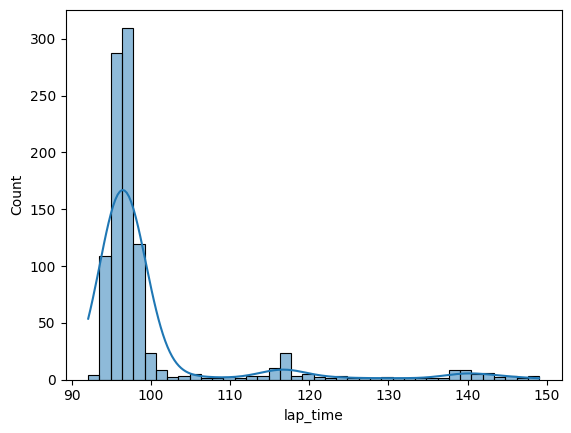

In [5]:
print('-----HISTOGRAM OF LAP TIMES -----')
race_lap = df_bahrain[~(df_bahrain['is_inlap']) | (df_bahrain['is_outlap'])]

sns.histplot(race_lap['lap_time'], bins=40, kde=True)

LAP TIME VS LAP NUMBER
Fuel burn effect (lap_time drops early)

Tyre degradation rising later

Pit stops reset lap_time

SC spikes (if any)


<Axes: xlabel='lap_number', ylabel='lap_time'>

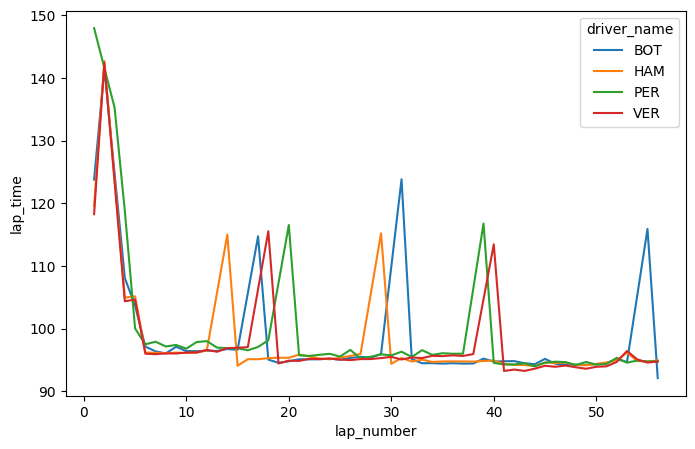

In [6]:
print('LAP TIME VS LAP NUMBER')
print('''Fuel burn effect (lap_time drops early)

Tyre degradation rising later

Pit stops reset lap_time

SC spikes (if any)''')

drivers = ['HAM', 'VER', 'BOT', 'PER']

plt.figure(figsize=(8,5))
sns.lineplot(data = race_lap[race_lap['driver_name'].isin(drivers)], x='lap_number', y ='lap_time', hue='driver_name')

----- LAP TIME VS TYRE AGE ------

      Fuel burn effect (lap_time drops early)

Tyre degradation rising later

Pit stops reset lap_time

SC spikes (if any)
      


<Axes: xlabel='tyre_age', ylabel='lap_time'>

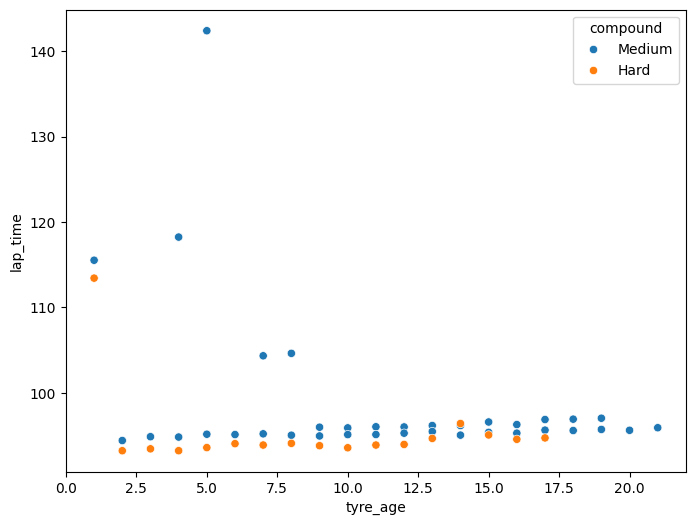

In [7]:
print('----- LAP TIME VS TYRE AGE ------')
print('''
      Fuel burn effect (lap_time drops early)

Tyre degradation rising later

Pit stops reset lap_time

SC spikes (if any)
      ''')


driver = 'VER'
plt.figure(figsize=(8,6))
sns.scatterplot(data = race_lap[race_lap['driver_name']==driver], x='tyre_age', y='lap_time', hue='compound')


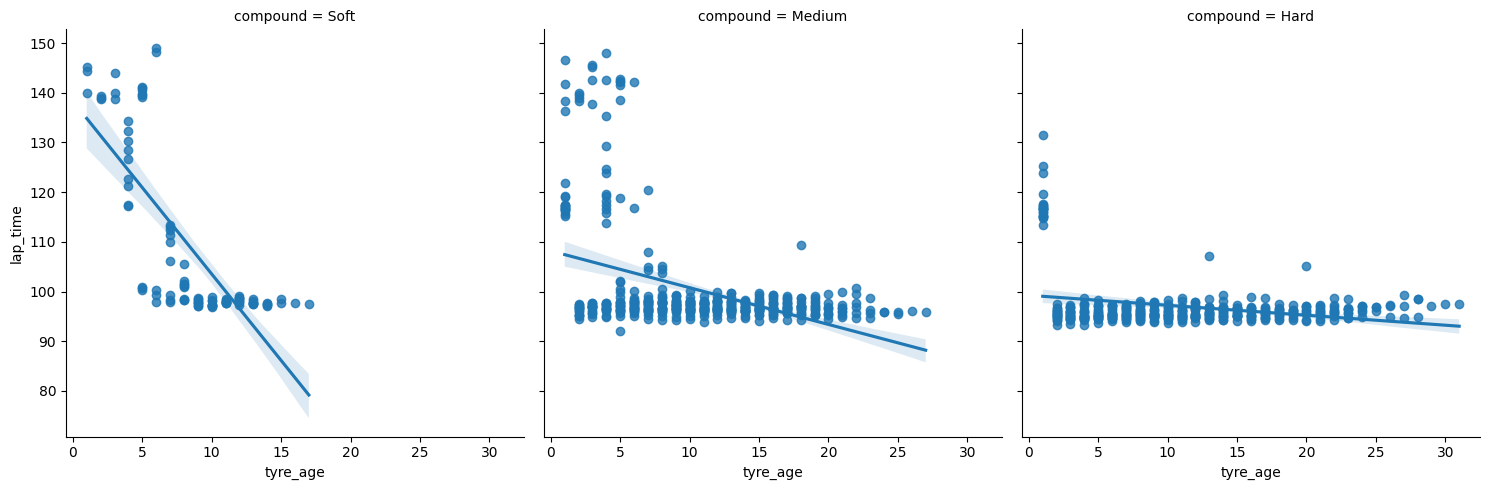

In [8]:
sns.lmplot(data=race_lap, x="tyre_age", y="lap_time", col="compound")


----- LAP TIME BY COMPOUND -----

      Soft < Medium < Hard (early stints)

Hard < Medium < Soft (late stints)

Strategy differences become clear
        


<Axes: xlabel='compound', ylabel='lap_time'>

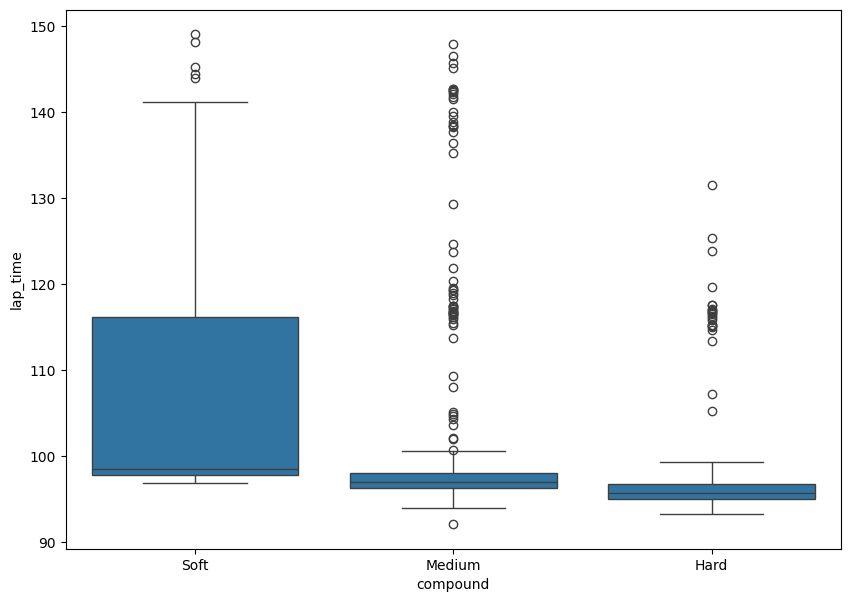

In [9]:
print('----- LAP TIME BY COMPOUND -----')
print('''
      Soft < Medium < Hard (early stints)

Hard < Medium < Soft (late stints)

Strategy differences become clear
        ''')


plt.figure(figsize=(10,7))
sns.boxplot(data = race_lap, x ='compound', y='lap_time')

----- LAP TIME DELTA ANALYSIS -----

      Slight negative median (driver improves early)

Slight positive tail (tyre degradation)

Large spikes → pit laps

Very negative spikes → outlaps

      


<Axes: xlabel='lap_time_delta', ylabel='Count'>

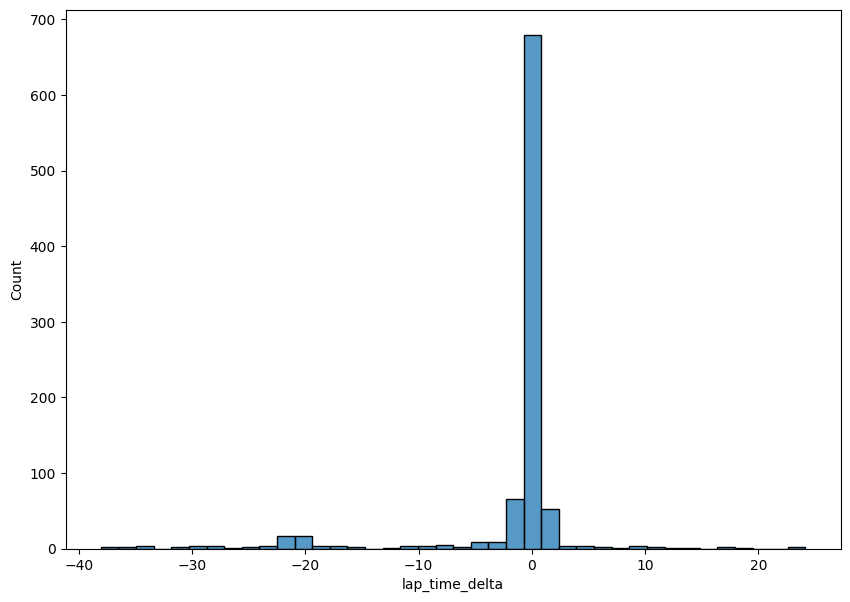

In [10]:
print('----- LAP TIME DELTA ANALYSIS -----')
print('''
      Slight negative median (driver improves early)

Slight positive tail (tyre degradation)

Large spikes → pit laps

Very negative spikes → outlaps
      
      ''')

plt.figure(figsize=(10,7))
sns.histplot(race_lap['lap_time_delta'], bins=40)

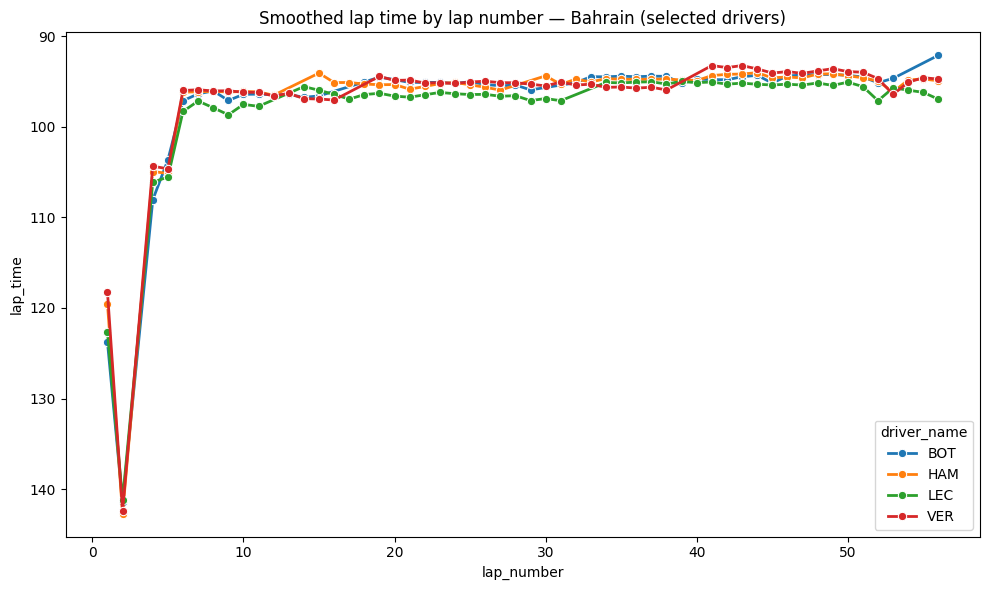

In [11]:

# 1) Start from the cleaned selection we agreed on
clean = df_bahrain[~(df_bahrain['is_outlap'] | df_bahrain['is_inlap'])]

# pick drivers
drivers = ['VER','HAM','BOT','LEC']
df_sel = clean[clean['driver_name'].isin(drivers)].copy()   # <-- important .copy()

# 2) Sort so rolling works correctly
df_sel = df_sel.sort_values(['driver_name','lap_number'])

# 3) Compute smoothed lap time safely (no SettingWithCopyWarning)
# df_sel.loc[:, 'lap_smoothed'] = df_sel.groupby('driver_name')['lap_time'] \
#                                       .transform(lambda x: x.rolling(3, min_periods=1).mean())

# 4) Ensure types OK and drop any rows with missing lap_time
df_sel = df_sel[df_sel['lap_time'].notna()]
df_sel['lap_number'] = df_sel['lap_number'].astype(int)

# 5) Plot as a line (not a scatter). Set estimator=None to avoid aggregation
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_sel,
    x='lap_number',
    y='lap_time',
    hue='driver_name',
    estimator=None,       # plot actual lines per driver
    lw=2,
    marker='o'
)
plt.title('Smoothed lap time by lap number — Bahrain (selected drivers)')
plt.gca().invert_yaxis()   # optional if you prefer faster laps at top (remove if not)
plt.tight_layout()
plt.show()
